In [161]:
import os
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
%matplotlib inline

In [162]:
print(os.getcwd())

C:\Users\radvanyi\PycharmProjects\ZSI_analytics\PATSTAT


In [163]:
outdir="EU_CH_scope/v2_"

appln = pd.read_csv(f"{outdir}/tls_201_scope.csv")

appln_title = pd.read_csv(f"{outdir}/tls_202_scope.csv")

pers = pd.read_csv(f"{outdir}/tls_206_scope.csv")

appln_pers = pd.read_csv(f"{outdir}/tls_207_scope.csv")

appln_cpc = pd.read_csv(f"{outdir}/tls_224_scope.csv")

cpc_desc = pd.read_csv(r"CPC_data/cpc_defs.csv")

country_defs = pd.read_csv(f"{outdir}/table_tls801.csv").rename(columns={"st3_name":"Country"})

In [164]:
ch_codes = ["CN","HK","MO","TW"]
ch_names = country_defs[country_defs["ctry_code"].isin(ch_codes)]["Country"].unique()

In [165]:
country_defs

ctry_code iso_alpha3                           Country organisation_flag   
0                                                  unknown                 Y  \
1          AD        AND                           Andorra                     
2          AE        ARE              United Arab Emirates                     
3          AF        AFG                       Afghanistan                     
4          AG        ATG               Antigua and Barbuda                     
..        ...        ...                               ...               ...   
237        YE        YEM                             Yemen                     
238        YU        YUG  Yugoslavia/Serbia and Montenegro                     
239        ZA        ZAF                      South Africa                     
240        ZM        ZMB                            Zambia                     
241        ZW        ZWE                          Zimbabwe                     

         continent eu_member epo_member oecd_member discontinued  
0              NaN                                                
1           Europe                                                
2             Asia                                                
3             Asia                                                
4    North America                                                
..             ...       ...        ...         ...          ...  
237           Asia                                                
238         Europe                                             Y  
239         Africa                                                
240         Africa                                                
241         Africa                                                

[242 rows x 9 columns]

In [166]:
appln.head()

appln_id appln_auth    appln_nr appln_kind appln_filing_date   
0  330225325         EP    11150195         A         2011-01-05  \
1  330322632         EP    11150485         A         2011-01-10   
2  330350961         EP    11150683         A         2011-01-12   
3  330374780         WO  2011050339         W         2011-01-12   
4  330424360         WO  2011050199         W         2011-01-10   

   appln_filing_year appln_nr_original ipr_type receiving_office   
0               2011          11150195       PI                   \
1               2011          11150485       PI                    
2               2011          11150683       PI                    
3               2011     EP2011/050339       PI               EP   
4               2011     EP2011/050199       PI               EP   

   internat_appln_id  ... earliest_publn_date earliest_publn_year   
0                  0  ...          2011-07-13                2011  \
1                  0  ...          2012-07-11                2012   
2                  0  ...          2012-07-18                2012   
3                  0  ...          2011-07-21                2011   
4                  0  ...          2012-07-19                2012   

  earliest_pat_publn_id granted  docdb_family_id  inpadoc_family_id   
0             335277427       Y         43754737          330225325  \
1             364719889       Y         43991052          330322632   
2             364923578       N         43881056          330350961   
3             335927718       N         43923624          330374780   
4             365345607       N         43533009          330424360   

  docdb_family_size  nb_citing_docdb_fam  nb_applicants nb_inventors  
0                 4                   16              1            1  
1                 2                    5              1            2  
2                 7                   12              2            5  
3                 2                    8              5            4  
4                 4                   13              3            2  

[5 rows x 26 columns]

In [167]:
appln[["appln_id","appln_nr","appln_nr_original"]].nunique()

appln_id             64266
appln_nr             63242
appln_nr_original    62651
dtype: int64

In [168]:
 # only first submissions
appln = appln[appln["appln_nr"]==appln["appln_nr_original"]]
appln_pers = appln_pers[appln_pers["appln_id"].isin(appln["appln_id"])]

In [169]:
appln_ctry = appln_pers.merge(pers[["person_id","person_ctry_code"]],
                 on="person_id").merge(country_defs[["Country","ctry_code"]],
                                       left_on="person_ctry_code", right_on="ctry_code").drop(columns=["ctry_code","person_ctry_code"])
appln_ctry["Country_Type"] = "EU"
appln_ctry.loc[appln_ctry["Country"].isin(ch_names),"Country_Type"] = "CH"
appln_ctry

person_id   appln_id  applt_seq_nr  invt_seq_nr  Country Country_Type
0               1  340314532             1            0  Finland           EU
1               1  413601768             1            0  Finland           EU
2             128  332888018             1            0  Finland           EU
3             128  333546132             1            0  Finland           EU
4             128  334765473             1            0  Finland           EU
...           ...        ...           ...          ...      ...          ...
106442   65263479  504779814             2            0   Latvia           EU
106443   65263479  544264361             2            0   Latvia           EU
106444   69866789  481190056             2            0   Latvia           EU
106445   80730412  554759601             2            0   Latvia           EU
106446   84881241  569497458             0            1   Latvia           EU

[106447 rows x 6 columns]

Text(0.5, 0, 'Year')

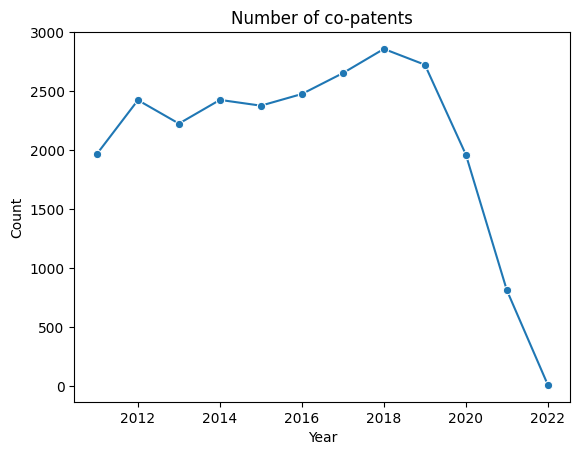

In [170]:
data = appln.groupby(["appln_filing_year"], as_index=False)["appln_id"].count()
data
g = sns.lineplot(data, x="appln_filing_year", y="appln_id", marker="o")
g.set_title("Number of co-patents")
g.set_ylabel("Count")
g.set_xlabel("Year")

In [171]:

eu_invt = appln_ctry[((appln_ctry["Country_Type"]=="EU") & (appln_ctry['invt_seq_nr']>0))]["appln_id"].unique()
eu_applt = appln_ctry[((appln_ctry["Country_Type"]=="EU") & (appln_ctry['applt_seq_nr']>0))]["appln_id"].unique()
ch_invt = appln_ctry[((appln_ctry["Country_Type"]=="CH" )& (appln_ctry['invt_seq_nr']>0))]["appln_id"].unique()
ch_applt = appln_ctry[((appln_ctry["Country_Type"]=="CH") & (appln_ctry['applt_seq_nr']>0))]["appln_id"].unique()

appln["co_inventors"] = appln["appln_id"].isin(eu_invt) & appln["appln_id"].isin(ch_invt)
appln["co_applicants"] = appln["appln_id"].isin(eu_applt) & appln["appln_id"].isin(ch_applt)

appln["foreign ownership (CH inventors; EU owned)"] = (appln["appln_id"].isin(eu_applt) & appln["appln_id"].isin(ch_invt) &
                                             ~appln["appln_id"].isin(eu_invt) & ~appln["appln_id"].isin(ch_applt))
appln["foreign ownership (EU inventors; CH owned)"] = (appln["appln_id"].isin(ch_applt) & appln["appln_id"].isin(eu_invt) &
                                             ~appln["appln_id"].isin(ch_invt)& ~appln["appln_id"].isin(eu_applt))

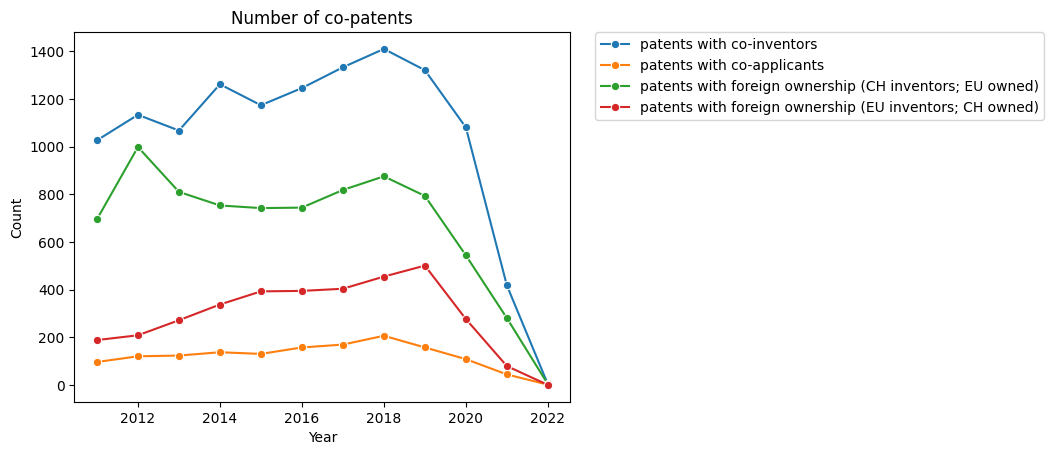

In [172]:
cols = ["co_inventors","co_applicants",
        "foreign ownership (CH inventors; EU owned)",
        "foreign ownership (EU inventors; CH owned)"]

for c in cols:
    data = appln[appln[c]==True].groupby(["appln_filing_year"], as_index=False)["appln_id"].count()
    g = sns.lineplot(data, x="appln_filing_year", y="appln_id", marker="o")
g.set_title(f"Number of co-patents")
g.set_ylabel("Count")
g.set_xlabel("Year")
g.legend(handles=g.lines,labels=["patents with " + c.replace("_","-") for c in cols], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

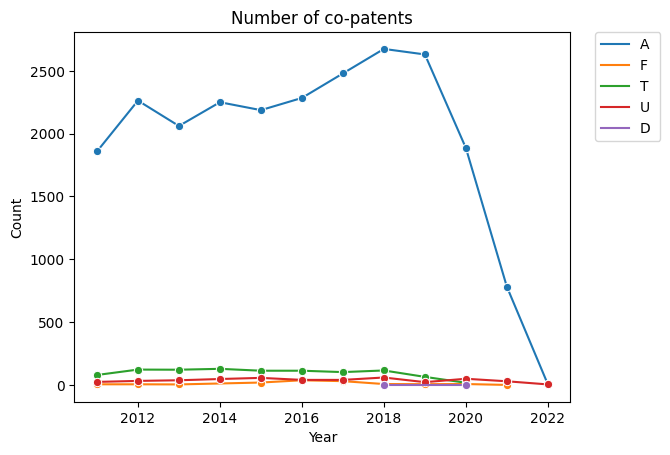

In [173]:
data = appln.groupby(["appln_filing_year","appln_kind"], as_index=False)["appln_id"].count()
data
g = sns.lineplot(data, x="appln_filing_year", y="appln_id", marker="o", hue="appln_kind")
g.set_title("Number of co-patents")
g.set_ylabel("Count")
g.set_xlabel("Year")
g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Year')

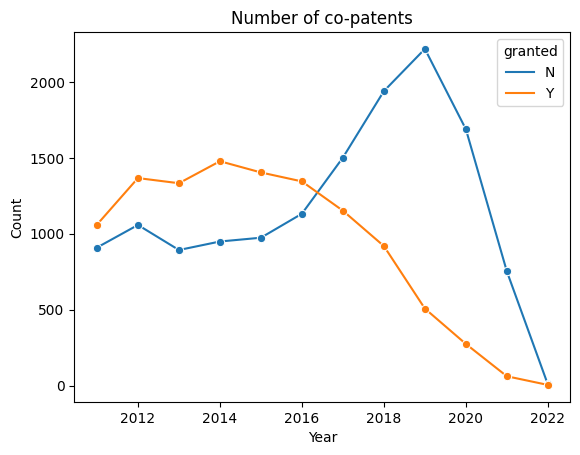

In [174]:
data = appln.groupby(["appln_filing_year","granted"], as_index=False)["appln_id"].count()
data
g = sns.lineplot(data, x="appln_filing_year", y="appln_id", hue="granted", marker="o")
g.set_title("Number of co-patents")
g.set_ylabel("Count")
g.set_xlabel("Year")

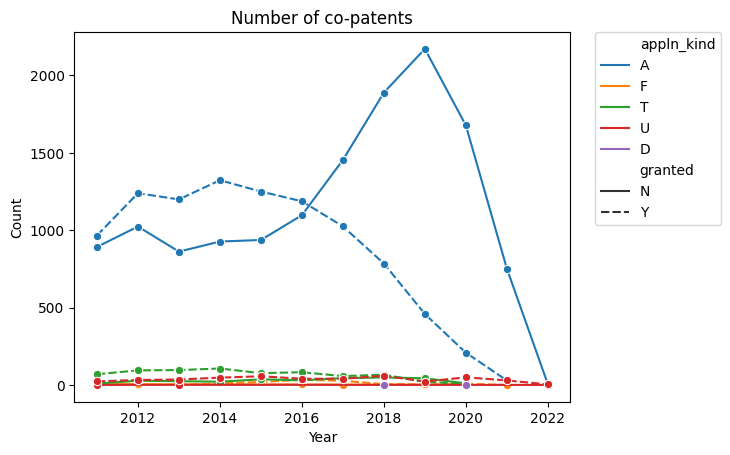

In [175]:
data = appln.groupby(["appln_filing_year","granted","appln_kind"], as_index=False)["appln_id"].count()
g = sns.lineplot(data, x="appln_filing_year", y="appln_id", hue="appln_kind",style="granted", marker="o")
g.set_title("Number of co-patents")
g.set_ylabel("Count")
g.set_xlabel("Year")
g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [176]:
data

appln_filing_year granted appln_kind  appln_id
0                2011       N         A        892
1                2011       N         F          6
2                2011       N         T         10
3                2011       N         U          1
4                2011       Y         A        966
..                ...     ...        ...       ...
70               2021       Y         F          1
71               2021       Y         U         30
72               2022       N         A          6
73               2022       N         U          1
74               2022       Y         U          4

[75 rows x 4 columns]

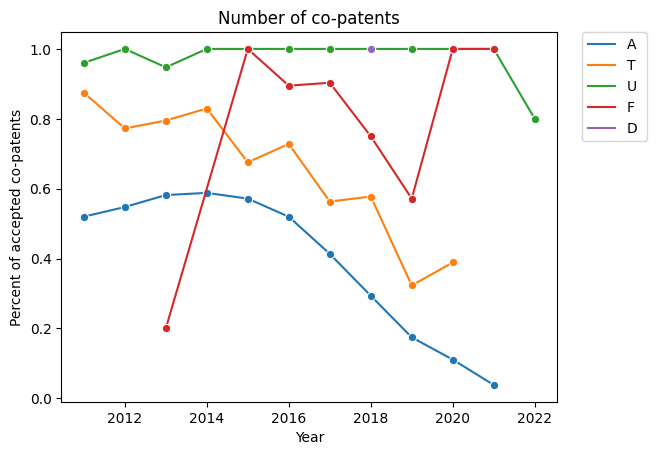

In [177]:
perc = data.groupby(['appln_filing_year',"appln_kind"], as_index=False)["appln_id"].sum().rename(columns={"appln_id":"sum"})
p_data = data.merge(perc, on = ['appln_filing_year',"appln_kind"])
p_data["percent"] = p_data["appln_id"]/p_data["sum"]
# p_data
g = sns.lineplot(p_data[p_data["granted"]=="Y"], x="appln_filing_year", y="percent", hue="appln_kind", marker="o")
g.set_title("Number of co-patents")
g.set_ylabel("Percent of accepted co-patents")
g.set_xlabel("Year")
g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [178]:
for kind in sorted(appln["appln_kind"].unique()):
    sub_data = data[data["appln_kind"]==kind]

In [179]:
# Granted patents
# granted = appln[appln["granted"]=="Y"]["appln_id"].unique()
# appln_pers=[appln_pers["appln_id"].isin(granted)]

In [180]:
patstat_collabs = appln_pers.merge(pers, on="person_id")
patstat_collabs = patstat_collabs.merge(country_defs, left_on="person_ctry_code", right_on="ctry_code")
patstat_collabs = patstat_collabs.groupby("appln_id",as_index=False)["Country"].unique().explode('Country')

In [181]:
country_collab = patstat_collabs[patstat_collabs["Country"].isin(ch_names)]["Country"].value_counts().reset_index()
country_collab["percent"] = country_collab["count"]/patstat_collabs["appln_id"].nunique()
country_collab["weight"] = country_collab["count"]/patstat_collabs["appln_id"].size
country_collab

Country  count   percent    weight
0                     China  22137  0.888073  0.415765
1  Taiwan Province Of China   2593  0.104024  0.048700
2          Hong Kong, China    581  0.023308  0.010912
3         Macao SAR (China)     17  0.000682  0.000319

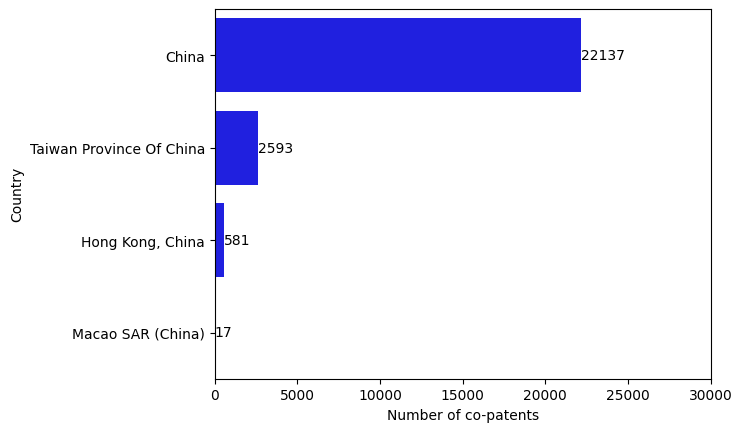

In [182]:
data = country_collab
g = sns.barplot(data, x="count", y="Country", color="blue")
g.set_xlim(0,30000)
g.set_ylabel("Country")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)

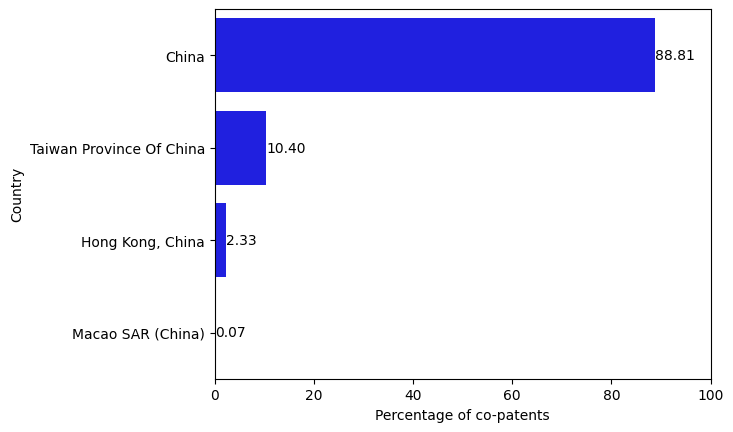

In [183]:
data = country_collab
data["percent_round"] = (data["percent"]*100).round(2)
g = sns.barplot(data, x="percent_round", y="Country", color="blue")
g.set_xlim(0,100)
g.set_ylabel("Country")
g.set_xlabel("Percentage of co-patents")
for i in g.containers:
    # g.bar_label(i,fmt='%.2f%%')
    g.bar_label(i,fmt='%.2f')

In [184]:
country_collab = patstat_collabs[~patstat_collabs["Country"].isin(ch_names)]["Country"].value_counts().reset_index()
country_collab["percent"] = country_collab["count"]/patstat_collabs["appln_id"].nunique()
country_collab["weight"] = country_collab["count"]/patstat_collabs["appln_id"].size
country_collab

Country  count   percent    weight
0       Germany   9725  0.390139  0.182650
1        France   4381  0.175753  0.082282
2        Sweden   3667  0.147110  0.068872
3   Netherlands   2900  0.116340  0.054466
4       Finland   1644  0.065953  0.030877
5       Belgium   1028  0.041240  0.019307
6         Italy   1000  0.040117  0.018781
7       Denmark    705  0.028283  0.013241
8         Spain    678  0.027199  0.012734
9       Austria    484  0.019417  0.009090
10      Ireland    469  0.018815  0.008809
11       Poland    289  0.011594  0.005428
12       Greece    234  0.009387  0.004395
13   Luxembourg    146  0.005857  0.002742
14     Portugal    111  0.004453  0.002085
15      Hungary     75  0.003009  0.001409
16      Czechia     72  0.002888  0.001352
17     Bulgaria     69  0.002768  0.001296
18      Romania     68  0.002728  0.001277
19     Slovakia     43  0.001725  0.000808
20       Cyprus     35  0.001404  0.000657
21     Slovenia     28  0.001123  0.000526
22      Croatia     25  0.001003  0.000470
23        Malta     15  0.000602  0.000282
24      Estonia     11  0.000441  0.000207
25    Lithuania      8  0.000321  0.000150
26       Latvia      6  0.000241  0.000113

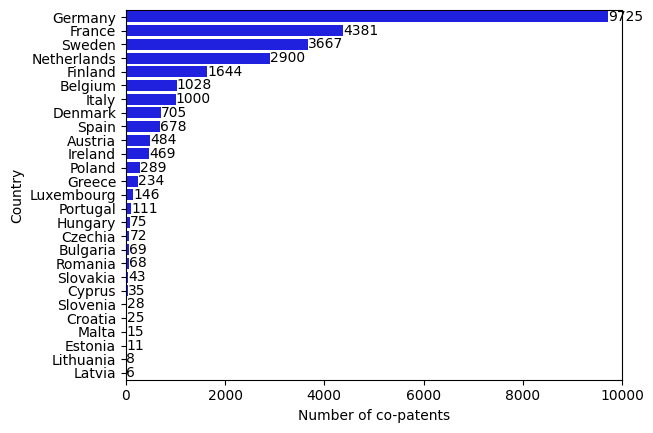

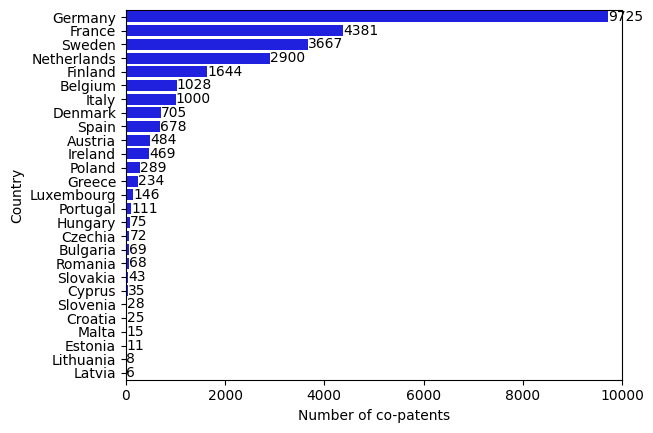

In [185]:
data = country_collab
g = sns.barplot(data, x="count", y="Country", color="blue")
g.set_xlim(0,10000)
g.set_ylabel("Country")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)

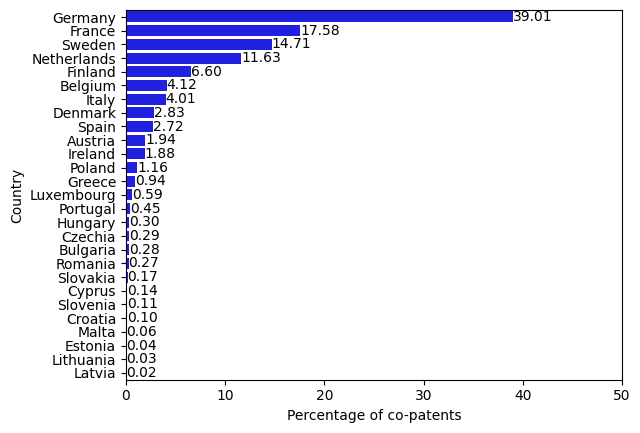

In [186]:
data = country_collab
data["percent_round"] = (data["percent"]*100).round(2)
g = sns.barplot(data, x="percent_round", y="Country", color="blue")
g.set_xlim(0,50)
g.set_ylabel("Country")
g.set_xlabel("Percentage of co-patents")
for i in g.containers:
    # g.bar_label(i,fmt='%.2f%%')
    g.bar_label(i,fmt='%.2f')

# Pivot country - year

In [187]:
record_col = "appln_id"
patstat_collabs_y=patstat_collabs.merge(appln[[record_col,"appln_filing_year"]], on="appln_id")
patstat_collabs_y

appln_id  Country  appln_filing_year
0      330225325  Germany               2011
1      330225325    China               2011
2      330322632  Germany               2011
3      330322632    China               2011
4      330350961   Sweden               2011
...          ...      ...                ...
53239  575355937    China               2017
53240  575399552   Sweden               2020
53241  575399552    China               2020
53242  575406608  Germany               2014
53243  575406608    China               2014

[53244 rows x 3 columns]

In [188]:
countall = patstat_collabs_y.groupby("appln_filing_year", as_index=False)[record_col].nunique()
data = patstat_collabs_y.groupby("appln_filing_year", as_index=False)["Country"].value_counts().merge(countall, on="appln_filing_year")
data["percent"] = data["count"]/data[record_col]
data_ch = data[data["Country"].isin(ch_names)]
data_ch

appln_filing_year                   Country  count  appln_id   percent
0                 2011                     China   1719      1969  0.873032
5                 2011  Taiwan Province Of China    195      1969  0.099035
9                 2011          Hong Kong, China     75      1969  0.038090
24                2011         Macao SAR (China)      3      1969  0.001524
27                2012                     China   2101      2425  0.866392
31                2012  Taiwan Province Of China    297      2425  0.122474
37                2012          Hong Kong, China     60      2425  0.024742
53                2013                     China   1970      2226  0.884996
58                2013  Taiwan Province Of China    221      2226  0.099281
63                2013          Hong Kong, China     47      2226  0.021114
73                2013         Macao SAR (China)      4      2226  0.001797
79                2014                     China   2172      2427  0.894932
84                2014  Taiwan Province Of China    236      2427  0.097239
91                2014          Hong Kong, China     39      2427  0.016069
105               2014         Macao SAR (China)      1      2427  0.000412
106               2015                     China   2079      2378  0.874264
111               2015  Taiwan Province Of China    275      2378  0.115643
117               2015          Hong Kong, China     48      2378  0.020185
130               2015         Macao SAR (China)      1      2378  0.000421
132               2016                     China   2201      2477  0.888575
137               2016  Taiwan Province Of China    255      2477  0.102947
144               2016          Hong Kong, China     54      2477  0.021801
160               2016         Macao SAR (China)      2      2477  0.000807
161               2017                     China   2417      2654  0.910701
166               2017  Taiwan Province Of China    211      2654  0.079503
171               2017          Hong Kong, China     55      2654  0.020723
188               2018                     China   2596      2859  0.908010
193               2018  Taiwan Province Of China    252      2859  0.088143
199               2018          Hong Kong, China     68      2859  0.023785
215               2019                     China   2460      2725  0.902752
220               2019  Taiwan Province Of China    269      2725  0.098716
228               2019          Hong Kong, China     61      2725  0.022385
238               2019         Macao SAR (China)      4      2725  0.001468
243               2020                     China   1718      1963  0.875191
248               2020  Taiwan Province Of China    249      1963  0.126847
254               2020          Hong Kong, China     59      1963  0.030056
269               2020         Macao SAR (China)      2      1963  0.001019
271               2021                     China    694       813  0.853629
274               2021  Taiwan Province Of China    133       813  0.163592
286               2021          Hong Kong, China     13       813  0.015990
297               2022                     China     10        11  0.909091
300               2022          Hong Kong, China      2        11  0.181818

Text(95.7222222222222, 0.5, '')

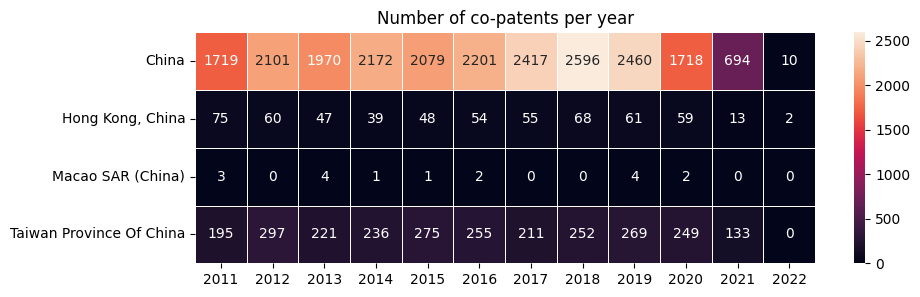

In [189]:
plt.figure(figsize=(10,3))
g = sns.heatmap(pd.pivot_table(data_ch,columns="appln_filing_year", index="Country", values="count").fillna(0).astype(int),
            annot=True, fmt=".0f",linewidth=.5)
g.set_title("Number of co-patents per year")
g.set_xlabel("")
g.set_ylabel("")

Text(95.7222222222222, 0.5, '')

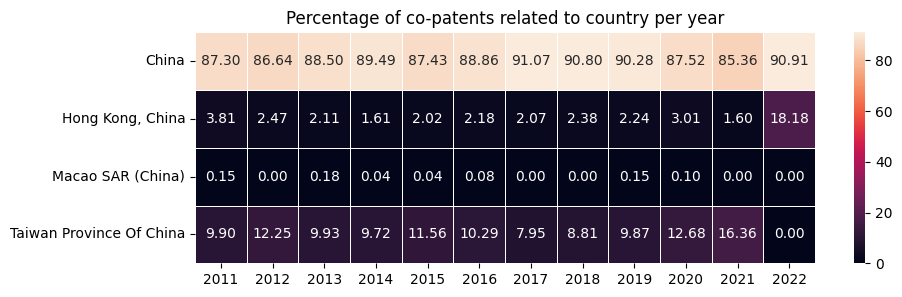

In [190]:
plt.figure(figsize=(10,3))
g = sns.heatmap(pd.pivot_table(data_ch,columns="appln_filing_year", index="Country", values="percent").fillna(0)*100,
            annot=True, fmt=".2f",linewidth=.5)
g.set_title("Percentage of co-patents related to country per year")
g.set_xlabel("")
g.set_ylabel("")

In [191]:
data_eu = data[~data["Country"].isin(ch_names)]
data_eu

appln_filing_year      Country  count  appln_id   percent
1                 2011      Germany    745      1969  0.378365
2                 2011       France    407      1969  0.206704
3                 2011  Netherlands    220      1969  0.111732
4                 2011       Sweden    209      1969  0.106145
6                 2011      Finland    166      1969  0.084307
..                 ...          ...    ...       ...       ...
298               2022        Spain      4        11  0.363636
299               2022      Germany      3        11  0.272727
301               2022  Netherlands      2        11  0.181818
302               2022        Italy      1        11  0.090909
303               2022      Denmark      1        11  0.090909

[262 rows x 5 columns]

Text(95.72222222222221, 0.5, '')

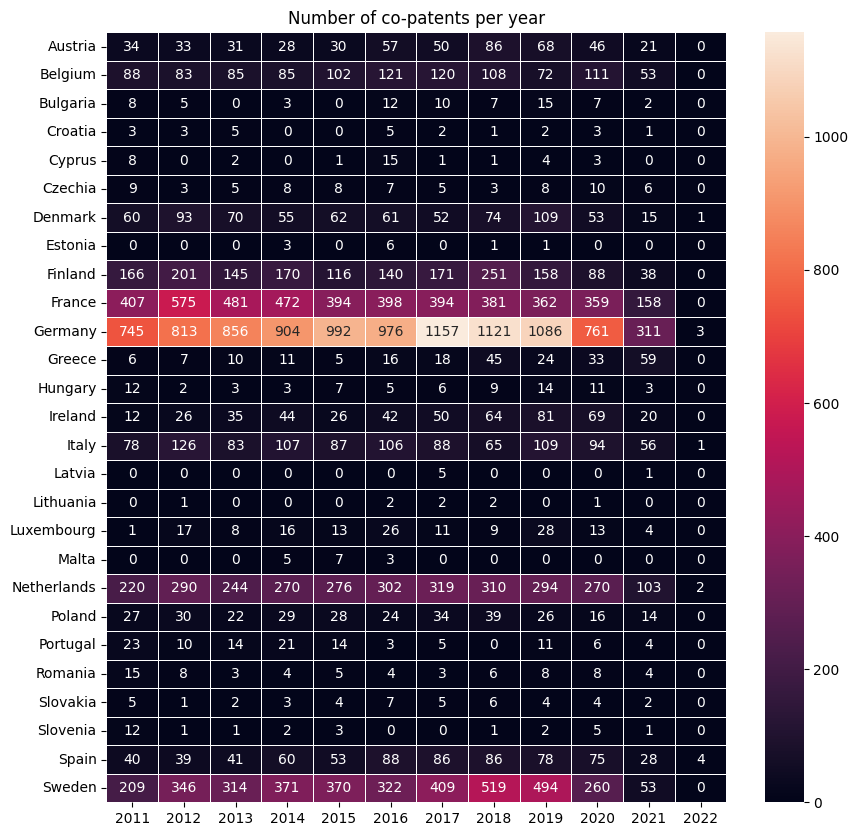

In [192]:
plt.figure(figsize=(10,10))
g = sns.heatmap(pd.pivot_table(data_eu,columns="appln_filing_year", index="Country", values="count").fillna(0).astype(int),
            annot=True, fmt=".0f",linewidth=.5)
g.set_title("Number of co-patents per year")
g.set_xlabel("")
g.set_ylabel("")

Text(95.72222222222221, 0.5, '')

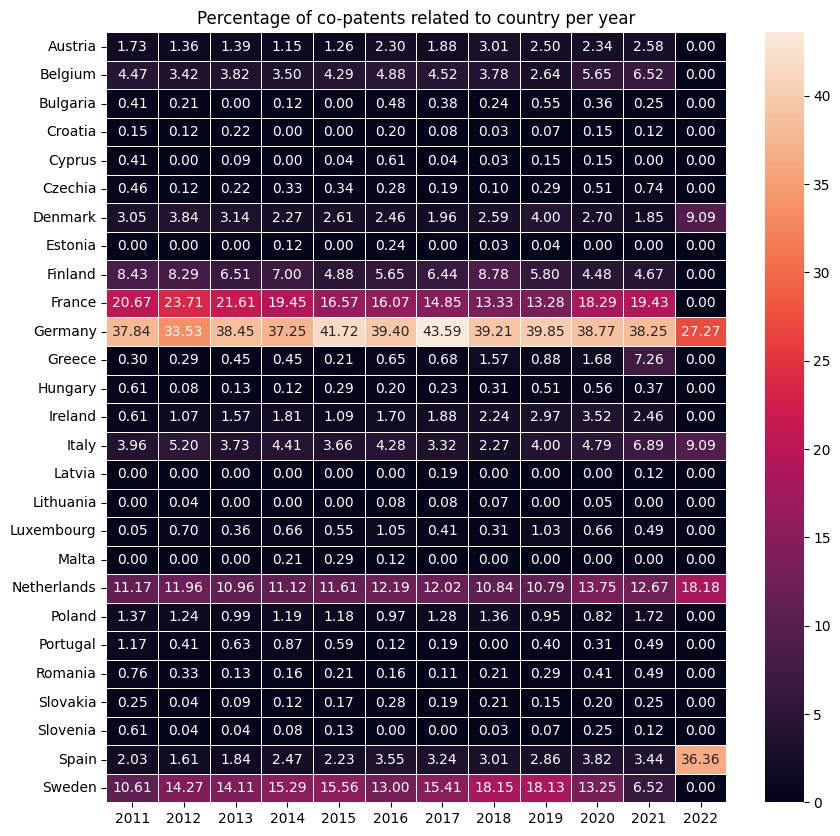

In [193]:
plt.figure(figsize=(10,10))
g = sns.heatmap(pd.pivot_table(data_eu,columns="appln_filing_year", index="Country", values="percent").fillna(0)*100,
            annot=True, fmt=".2f",linewidth=.5)
g.set_title("Percentage of co-patents related to country per year")
g.set_xlabel("")
g.set_ylabel("")

# Let's see about 'organizations'

In [194]:
# harmonized entities (sector and country too)

In [195]:
pers_han = pers[["person_id","han_id","han_name","psn_sector","person_ctry_code"]].drop_duplicates()
pers_han["psn_sector"].fillna("UNKNOWN", inplace=True)
pers_han = pers_han.sort_values(by="psn_sector", ascending=True)
pers_han.drop(columns="person_id", inplace=True)
pers_han = pers_han.groupby("han_id", as_index=False)[["han_name","psn_sector","person_ctry_code"]].agg(
    lambda x: pd.Series.mode(x)[0])
pers_han = pers_han.merge(country_defs,left_on="person_ctry_code",right_on="ctry_code")

In [196]:
patstat_collabs = appln_pers.merge(pers, on="person_id")
patstat_collabs = patstat_collabs.merge(country_defs, left_on="person_ctry_code", right_on="ctry_code")
org_collabs =  patstat_collabs[[record_col,"han_id","han_name","psn_sector","Country"]].drop_duplicates()
org_collabs["psn_sector"].fillna("UNKNOWN", inplace=True)
org_collabs

appln_id     han_id                 han_name  psn_sector  Country
0       340314532    2125445               NOKIA CORP     COMPANY  Finland
1       413601768    2125445               NOKIA CORP     COMPANY  Finland
2       332888018    2125445               NOKIA CORP     COMPANY  Finland
3       333546132    2125445               NOKIA CORP     COMPANY  Finland
4       334765473    2125445               NOKIA CORP     COMPANY  Finland
...           ...        ...                      ...         ...      ...
106442  504779814    3652317        VAVILOVS VALERIJS  INDIVIDUAL   Latvia
106443  544264361    3652317        VAVILOVS VALERIJS  INDIVIDUAL   Latvia
106444  481190056    3652317        VAVILOVS VALERIJS  INDIVIDUAL   Latvia
106445  554759601    3652317        VAVILOVS VALERIJS  INDIVIDUAL   Latvia
106446  569497458  184881241  ZAVORONKOVS, ALEKSANDRS     UNKNOWN   Latvia

[106421 rows x 5 columns]

In [197]:
# China
org_collabs_ch = org_collabs[org_collabs["Country"].isin(ch_names)]["han_id"].value_counts().reset_index()
org_collabs_ch["percent"] = org_collabs_ch["count"]/org_collabs[record_col].nunique()
org_collabs_ch["weight"] = org_collabs_ch["count"]/org_collabs[record_col].size
org_collabs_ch = org_collabs_ch.merge(pers_han, on='han_id')
org_collabs_ch["org"] = org_collabs_ch["han_name"].str.strip() + " ("+org_collabs_ch["person_ctry_code"]+")"
org_collabs_ch

han_id  count   percent    weight   
0        1337324   1723  0.069122  0.016190  \
1        3697072    270  0.010832  0.002537   
2          62077    204  0.008184  0.001917   
3        1912470    130  0.005215  0.001222   
4        2607939    101  0.004052  0.000949   
...          ...    ...       ...       ...   
29061  151900860      1  0.000040  0.000009   
29062  151899043      1  0.000040  0.000009   
29063  151898719      1  0.000040  0.000009   
29064  151894061      1  0.000040  0.000009   
29065  183287157      1  0.000040  0.000009   

                                        han_name  psn_sector person_ctry_code   
0                             HUAWEI TECH CO LTD     COMPANY               CN  \
1             NINGBO GEELY AUTOMOBILE R&D CO LTD     COMPANY               CN   
2      TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD     COMPANY               TW   
3                                   MEDIATEK INC     COMPANY               TW   
4                              SELF ELECT CO LTD     COMPANY               CN   
...                                          ...         ...              ...   
29061                                 LI, FAHONG     UNKNOWN               CN   
29062                                  ZHANG, YI     UNKNOWN               CN   
29063                                  XU, EASON     UNKNOWN               CN   
29064                                  WENG, RAN  INDIVIDUAL               CN   
29065            LEFEBVRE, Marc René André Louis     UNKNOWN               MO   

      ctry_code iso_alpha3                   Country organisation_flag   
0            CN        CHN                     China                    \
1            CN        CHN                     China                     
2            TW        TWN  Taiwan Province Of China                     
3            TW        TWN  Taiwan Province Of China                     
4            CN        CHN                     China                     
...         ...        ...                       ...               ...   
29061        CN        CHN                     China                     
29062        CN        CHN                     China                     
29063        CN        CHN                     China                     
29064        CN        CHN                     China                     
29065        MO        MAC         Macao SAR (China)                     

      continent eu_member epo_member oecd_member discontinued   
0          Asia                                                \
1          Asia                                                 
2          Asia                                                 
3          Asia                                                 
4          Asia                                                 
...         ...       ...        ...         ...          ...   
29061      Asia                                                 
29062      Asia                                                 
29063      Asia                                                 
29064      Asia                                                 
29065      Asia                                                 

                                                  org  
0                             HUAWEI TECH CO LTD (CN)  
1             NINGBO GEELY AUTOMOBILE R&D CO LTD (CN)  
2      TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD (TW)  
3                                   MEDIATEK INC (TW)  
4                              SELF ELECT CO LTD (CN)  
...                                               ...  
29061                                 LI, FAHONG (CN)  
29062                                  ZHANG, YI (CN)  
29063                                  XU, EASON (CN)  
29064                                  WENG, RAN (CN)  
29065            LEFEBVRE, Marc René André Louis (MO)  

[29066 rows x 17 columns]

han_id  count   percent    weight   
0        1337324   1723  0.069122  0.016190  \
1        3697072    270  0.010832  0.002537   
2          62077    204  0.008184  0.001917   
3        1912470    130  0.005215  0.001222   
4        2607939    101  0.004052  0.000949   
...          ...    ...       ...       ...   
29061  151900860      1  0.000040  0.000009   
29062  151899043      1  0.000040  0.000009   
29063  151898719      1  0.000040  0.000009   
29064  151894061      1  0.000040  0.000009   
29065  183287157      1  0.000040  0.000009   

                                        han_name  psn_sector person_ctry_code   
0                             HUAWEI TECH CO LTD     COMPANY               CN  \
1             NINGBO GEELY AUTOMOBILE R&D CO LTD     COMPANY               CN   
2      TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD     COMPANY               TW   
3                                   MEDIATEK INC     COMPANY               TW   
4                              SELF ELECT CO LTD     COMPANY               CN   
...                                          ...         ...              ...   
29061                                 LI, FAHONG     UNKNOWN               CN   
29062                                  ZHANG, YI     UNKNOWN               CN   
29063                                  XU, EASON     UNKNOWN               CN   
29064                                  WENG, RAN  INDIVIDUAL               CN   
29065            LEFEBVRE, Marc René André Louis     UNKNOWN               MO   

      ctry_code iso_alpha3                   Country organisation_flag   
0            CN        CHN                     China                    \
1            CN        CHN                     China                     
2            TW        TWN  Taiwan Province Of China                     
3            TW        TWN  Taiwan Province Of China                     
4            CN        CHN                     China                     
...         ...        ...                       ...               ...   
29061        CN        CHN                     China                     
29062        CN        CHN                     China                     
29063        CN        CHN                     China                     
29064        CN        CHN                     China                     
29065        MO        MAC         Macao SAR (China)                     

      continent eu_member epo_member oecd_member discontinued   
0          Asia                                                \
1          Asia                                                 
2          Asia                                                 
3          Asia                                                 
4          Asia                                                 
...         ...       ...        ...         ...          ...   
29061      Asia                                                 
29062      Asia                                                 
29063      Asia                                                 
29064      Asia                                                 
29065      Asia                                                 

                                                  org  
0                             HUAWEI TECH CO LTD (CN)  
1             NINGBO GEELY AUTOMOBILE R&D CO LTD (CN)  
2      TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD (TW)  
3                                   MEDIATEK INC (TW)  
4                              SELF ELECT CO LTD (CN)  
...                                               ...  
29061                                 LI, FAHONG (CN)  
29062                                  ZHANG, YI (CN)  
29063                                  XU, EASON (CN)  
29064                                  WENG, RAN (CN)  
29065            LEFEBVRE, Marc René André Louis (MO)  

[29066 rows x 17 columns]

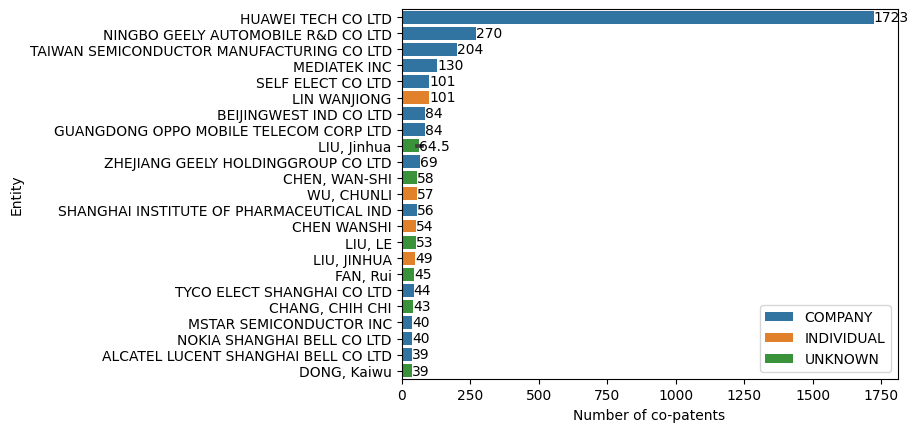

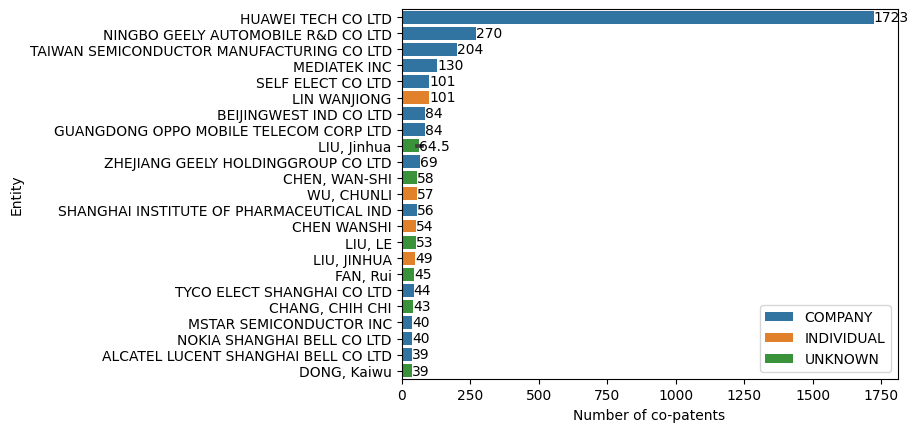

In [198]:
data = org_collabs_ch[0:25]
g = sns.barplot(data, x="count", y="han_name", hue="psn_sector", dodge=False)
g.set_ylabel("Entity")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)
g.legend(title=None)

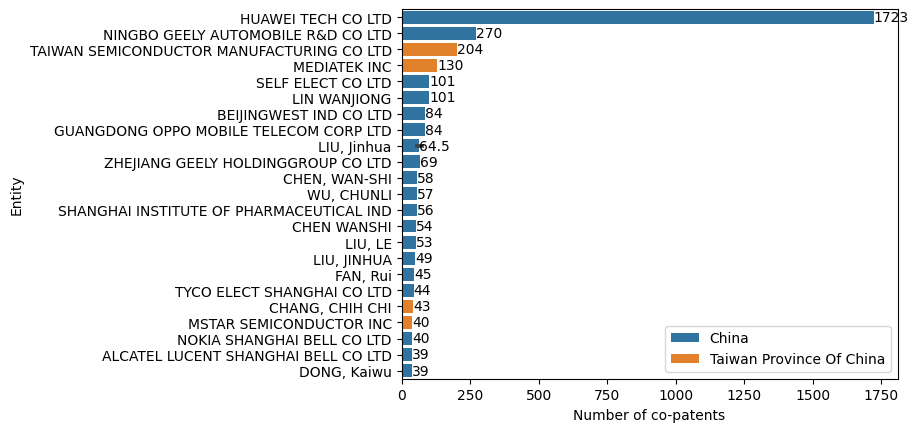

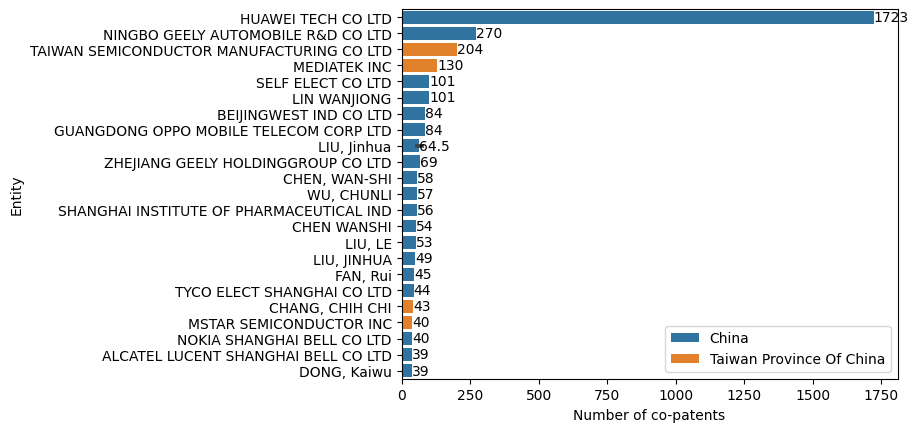

In [199]:
g = sns.barplot(data, x="count", y="han_name", hue="Country", dodge=False)
g.set_ylabel("Entity")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)
g.legend(title=None, loc=4)

In [200]:
# Eu
org_collabs_eu = org_collabs[~org_collabs["Country"].isin(ch_names)]["han_id"].value_counts().reset_index()
org_collabs_eu["percent"] = org_collabs_eu["count"]/org_collabs[record_col].nunique()
org_collabs_eu["weight"] = org_collabs_eu["count"]/org_collabs[record_col].size
org_collabs_eu = org_collabs_eu.merge(pers_han, on='han_id')
org_collabs_eu

han_id  count   percent    weight                     han_name   
0          13378   1851  0.074257  0.017393  TELEFON AB LM ERICSSON PUBL  \
1         228842    716  0.028724  0.006728                      BASF SE   
2        2562294    693  0.027801  0.006512               NOKIA TECH LTD   
3          68848    586  0.023509  0.005506               ALCATEL LUCENT   
4        2456791    524  0.021021  0.004924            ROBERT BOSCH GMBH   
...          ...    ...       ...       ...                          ...   
25665  151189488      1  0.000040  0.000009              Hundt, Wolfgang   
25666  151187794      1  0.000040  0.000009                Fischer, Peer   
25667  151187133      1  0.000040  0.000009                Daryani, Neha   
25668  151186834      1  0.000040  0.000009                 HEIL, Nadine   
25669  184881241      1  0.000040  0.000009      ZAVORONKOVS, ALEKSANDRS   

      psn_sector person_ctry_code ctry_code iso_alpha3  Country   
0        COMPANY               SE        SE        SWE   Sweden  \
1        COMPANY               DE        DE        DEU  Germany   
2        COMPANY               FI        FI        FIN  Finland   
3        COMPANY               FR        FR        FRA   France   
4        COMPANY               DE        DE        DEU  Germany   
...          ...              ...       ...        ...      ...   
25665    UNKNOWN               DE        DE        DEU  Germany   
25666    UNKNOWN               DE        DE        DEU  Germany   
25667    UNKNOWN               DE        DE        DEU  Germany   
25668    UNKNOWN               DE        DE        DEU  Germany   
25669    UNKNOWN               LV        LV        LVA   Latvia   

      organisation_flag continent eu_member epo_member oecd_member   
0                          Europe         Y          Y           Y  \
1                          Europe         Y          Y           Y   
2                          Europe         Y          Y           Y   
3                          Europe         Y          Y           Y   
4                          Europe         Y          Y           Y   
...                 ...       ...       ...        ...         ...   
25665                      Europe         Y          Y           Y   
25666                      Europe         Y          Y           Y   
25667                      Europe         Y          Y           Y   
25668                      Europe         Y          Y           Y   
25669                      Europe         Y          Y           Y   

      discontinued  
0                   
1                   
2                   
3                   
4                   
...            ...  
25665               
25666               
25667               
25668               
25669               

[25670 rows x 16 columns]

han_id  count   percent    weight                     han_name   
0          13378   1851  0.074257  0.017393  TELEFON AB LM ERICSSON PUBL  \
1         228842    716  0.028724  0.006728                      BASF SE   
2        2562294    693  0.027801  0.006512               NOKIA TECH LTD   
3          68848    586  0.023509  0.005506               ALCATEL LUCENT   
4        2456791    524  0.021021  0.004924            ROBERT BOSCH GMBH   
...          ...    ...       ...       ...                          ...   
25665  151189488      1  0.000040  0.000009              Hundt, Wolfgang   
25666  151187794      1  0.000040  0.000009                Fischer, Peer   
25667  151187133      1  0.000040  0.000009                Daryani, Neha   
25668  151186834      1  0.000040  0.000009                 HEIL, Nadine   
25669  184881241      1  0.000040  0.000009      ZAVORONKOVS, ALEKSANDRS   

      psn_sector person_ctry_code ctry_code iso_alpha3  Country   
0        COMPANY               SE        SE        SWE   Sweden  \
1        COMPANY               DE        DE        DEU  Germany   
2        COMPANY               FI        FI        FIN  Finland   
3        COMPANY               FR        FR        FRA   France   
4        COMPANY               DE        DE        DEU  Germany   
...          ...              ...       ...        ...      ...   
25665    UNKNOWN               DE        DE        DEU  Germany   
25666    UNKNOWN               DE        DE        DEU  Germany   
25667    UNKNOWN               DE        DE        DEU  Germany   
25668    UNKNOWN               DE        DE        DEU  Germany   
25669    UNKNOWN               LV        LV        LVA   Latvia   

      organisation_flag continent eu_member epo_member oecd_member   
0                          Europe         Y          Y           Y  \
1                          Europe         Y          Y           Y   
2                          Europe         Y          Y           Y   
3                          Europe         Y          Y           Y   
4                          Europe         Y          Y           Y   
...                 ...       ...       ...        ...         ...   
25665                      Europe         Y          Y           Y   
25666                      Europe         Y          Y           Y   
25667                      Europe         Y          Y           Y   
25668                      Europe         Y          Y           Y   
25669                      Europe         Y          Y           Y   

      discontinued  
0                   
1                   
2                   
3                   
4                   
...            ...  
25665               
25666               
25667               
25668               
25669               

[25670 rows x 16 columns]

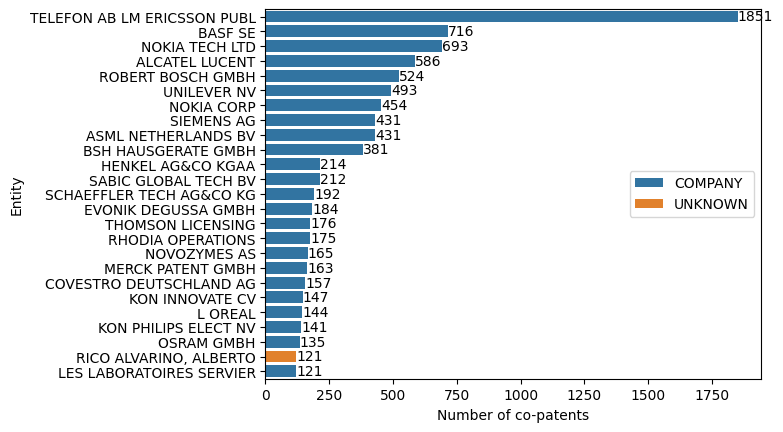

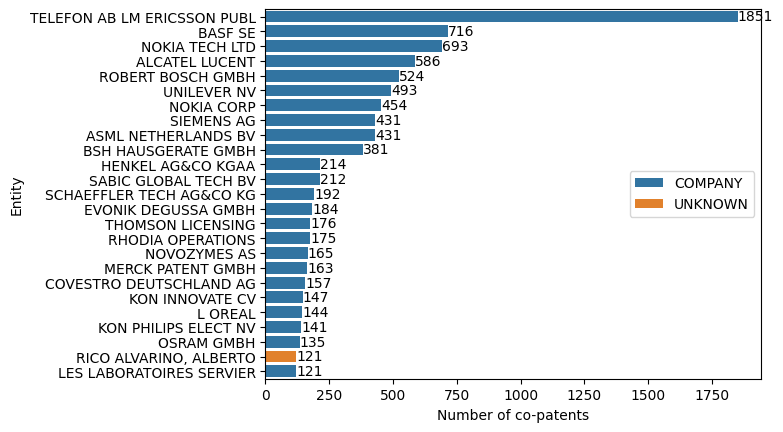

In [201]:
data = org_collabs_eu[0:25]
g = sns.barplot(data, x="count", y="han_name", hue="psn_sector", dodge=False)
g.set_ylabel("Entity")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)
g.legend(title=None)

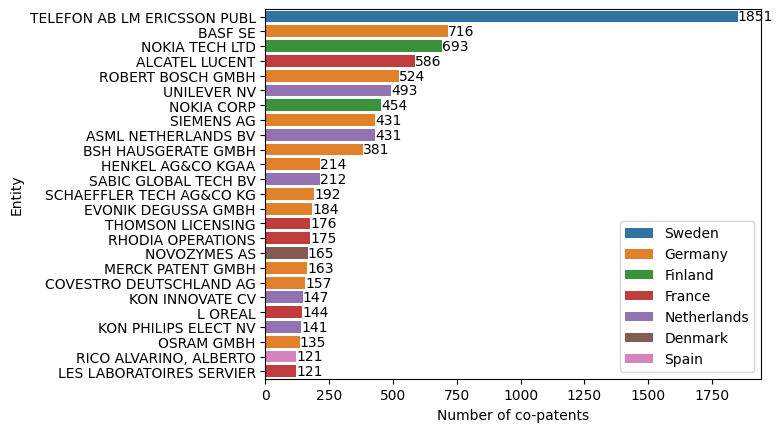

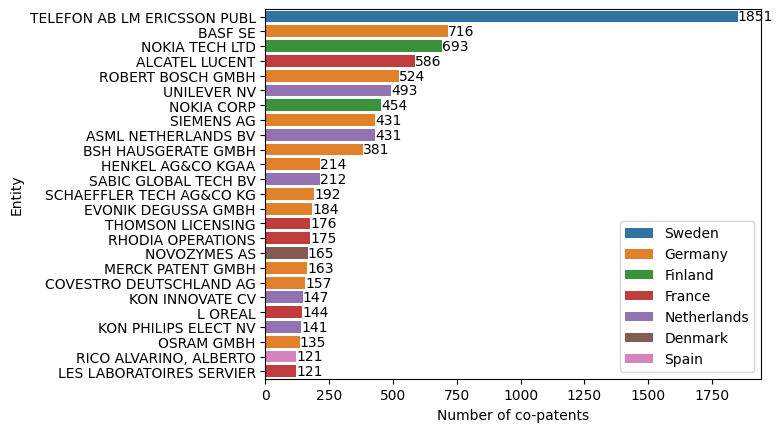

In [202]:
g = sns.barplot(data, x="count", y="han_name", hue="Country", dodge=False)
g.set_ylabel("Entity")
g.set_xlabel("Number of co-patents")
for i in g.containers:
    g.bar_label(i,)
g.legend(title=None, loc=4)

# Patent classes?